# Importing libraries 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [46]:
df=pd.read_csv("vehicle.csv")
df.shape

(846, 19)

In [47]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [48]:
df["class"].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

**we will label encode the target column**

In [49]:
d={"car":1,"bus":2,"van":3}
df["class"] = df["class"].replace(d) 

In [50]:
df.isnull().sum()
#there are a few missing values in almost every column

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [51]:
df[df.duplicated()]
#no duplicate rows

#keep parameter
# –> If ‘first’, it considers first value as unique and rest of the same values as duplicate.
# –> If ‘last’, it considers last value as unique and rest of the same values as duplicate.
# –> If False, it consider all of the same values as duplicates.

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [52]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                            int64
dtype: object

In [53]:
df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        845.000000     846.000000  846.000000  
mean         188.919527     195.632388    1.728132  
std            6.155809       7.438797    0.818044  
min          176.000000     181.000000    1.000000  
25%          184.000000     190.250000    1.000000  
50%          188.000000     197.000000    1.000000  
75%          193.000000     201.000000    2.000000  
max          206.000000     211.000000    3.000000

Most of the features have same mean and median therefore the data doesnt seem to be much skewed. However, the standard deviation in every feature is pretty high.

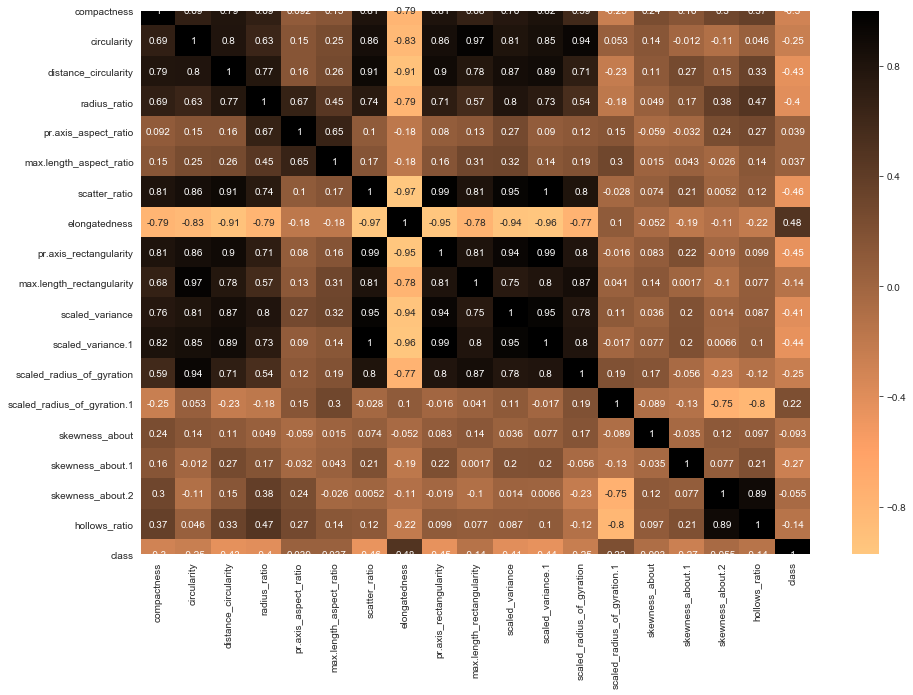

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="copper_r")

**lets see how the features are related to each other and the target variable.**<br>
We can see a lot of features are highly correlated to each other (>=0.8, most have +ve correlation). Many features even have -ve correlation with each other (eg: scaled_raduis_of_gyration.1 is highly negativly correlated with skewness_about.2 and hollow_ratio).<br>
As far as target correlation is concerned, no feature is highly correlated with the target variable.<br>
By looking at the above heatmap, we can say that there can be issues of multi-colinearity within the data since a lot of feature pairs are highly correlated.

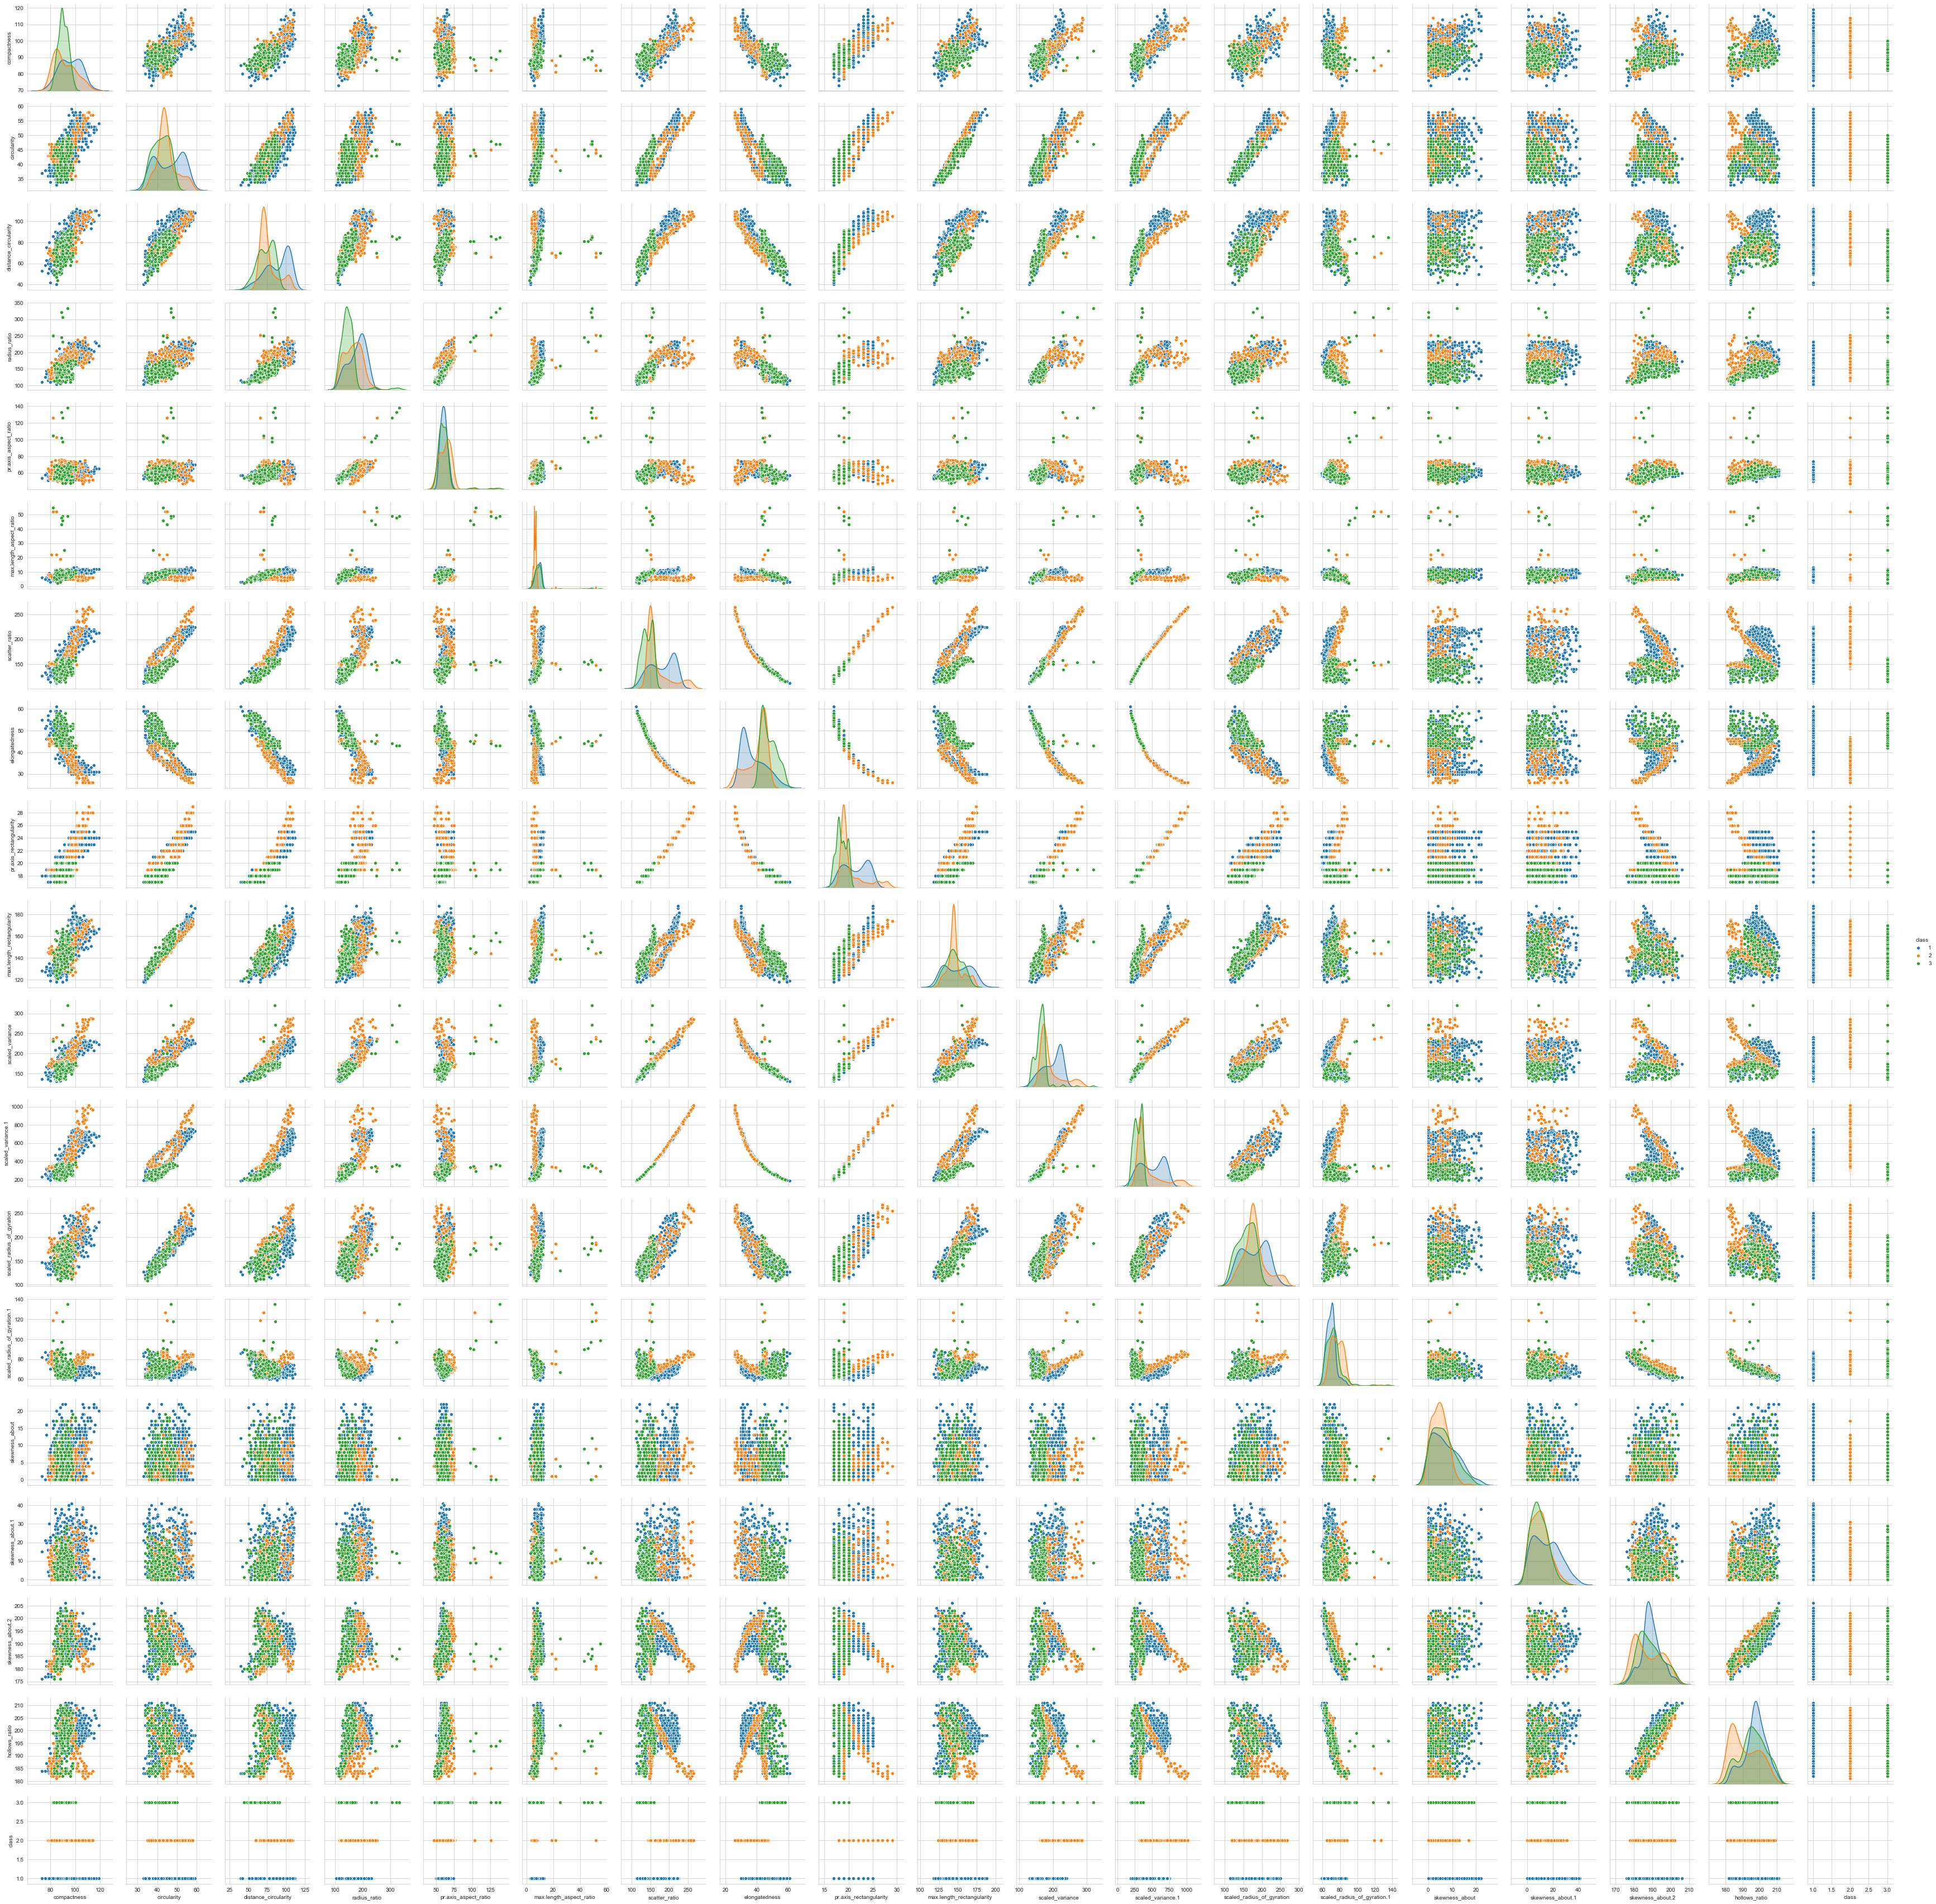

In [55]:
sns.pairplot(df,hue="class")

The pairplot also suggests that a lot of features have high correlation and colinearity. Some features are straight up colinear with correlation as high as 0.99 and 0.95 eg: look at **scaled_varience & scatter ratio** and **pr.axis_regularity & scatter_ratio**. **elongatedness and scatter ratio** have **very high negative correlation(-0.97)**.

# Treating missing data
we can see that we have 2-5 missing data in almost every column.. we will replace these values with the median, grouped by the class they belong to

In [56]:
imputation = df.groupby(by="class").median()
imputation

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
1               97         46.0                  94.0         186.0   
2               89         44.0                  72.0         167.5   
3               90         42.0                  75.0         144.0   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
1                      61.0                        9          185.0   
2                      64.0                        6          152.0   
3                      59.0                        9          142.0   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
1               36.0                    22.0                        150   
2               44.0                    19.0                        145   
3               47.0                    18.0                        145   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
1                206.0              512.0                      182.0   
2                177.0              344.0                      176.0   
3                164.0              300.0                      159.0   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
1                             70.0             6.0              14.0   
2                             76.0             5.0              10.0   
3                             72.0             6.0               9.0   

       skewness_about.2  hollows_ratio  
class                                   
1                 189.0            198  
2                 186.0            189  
3                 188.0            196

In [57]:
for col in df.columns[:-1]:
    df[col][(df["class"]==1)&(df[col].isnull())]=imputation[col][1]
    df[col][(df["class"]==2)&(df[col].isnull())]=imputation[col][2]
    df[col][(df["class"]==3)&(df[col].isnull())]=imputation[col][3]

In [58]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

# Outliers detection and treatment

In [59]:
outliers_list = []
# For each feature find the data points with extreme high or low values
for col in df.columns[:-1]:
    
    Q1 = np.percentile(a=df[col], q=25)
    Q3 = np.percentile(a=df[col], q=75)

    IQR = Q3 - Q1
    ul = Q3+(1.5*IQR) 
    ll = Q1-(1.5*IQR)
    
    print("outlier in feature: "+col+"("+str(len(df[(df[col]>ul) | (df[col]<ll)]))+")")
    display(df[(df[col]>ul) | (df[col]<ll)])
    outliers_list=outliers_list + list(df[(df[col]>ul) | (df[col]<ll)].index.values)

outlier in feature: compactness(0)


Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

outlier in feature: circularity(0)


Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

outlier in feature: distance_circularity(0)


Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

outlier in feature: radius_ratio(3)


compactness  circularity  distance_circularity  radius_ratio  \
37            90         48.0                  86.0         306.0   
135           89         47.0                  83.0         322.0   
388           94         47.0                  85.0         333.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
37                  126.0                       49          153.0   
135                 133.0                       48          158.0   
388                 138.0                       49          155.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
37            44.0                    19.0                        156   
135           43.0                    20.0                        163   
388           43.0                    19.0                        155   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
37             272.0              346.0                      200.0   
135            229.0              364.0                      176.0   
388            320.0              354.0                      187.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
37                         118.0             0.0              15.0   
135                         97.0             0.0              14.0   
388                        135.0            12.0               9.0   

     skewness_about.2  hollows_ratio  class  
37              185.0            194      3  
135             184.0            194      3  
388             188.0            196      3

outlier in feature: pr.axis_aspect_ratio(8)


compactness  circularity  distance_circularity  radius_ratio  \
4             85         44.0                  70.0         205.0   
37            90         48.0                  86.0         306.0   
100           82         45.0                  66.0         252.0   
135           89         47.0                  83.0         322.0   
291           89         45.0                  81.0         246.0   
388           94         47.0                  85.0         333.0   
523           90         43.0                  81.0         231.0   
706           82         43.0                  70.0         250.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                   103.0                       52          149.0   
37                  126.0                       49          153.0   
100                 126.0                       52          148.0   
135                 133.0                       48          158.0   
291                 102.0                       43          155.0   
388                 138.0                       49          155.0   
523                  97.0                       46          150.0   
706                 105.0                       55          139.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                        144   
37            44.0                    19.0                        156   
100           45.0                    19.0                        144   
135           43.0                    20.0                        163   
291           44.0                    20.0                        160   
388           43.0                    19.0                        155   
523           45.0                    19.0                        149   
706           48.0                    18.0                        145   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
37             272.0              346.0                      200.0   
100            237.0              326.0                      185.0   
135            229.0              364.0                      176.0   
291            200.0              347.0                      177.0   
388            320.0              354.0                      187.0   
523            200.0              332.0                      164.0   
706            231.0              289.0                      172.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
4                          127.0             9.0              11.0   
37                         118.0             0.0              15.0   
100                        119.0             1.0               1.0   
135                         97.0             0.0              14.0   
291                         90.0             9.0              17.0   
388                        135.0            12.0               9.0   
523                         91.0             5.0               9.0   
706                         99.0             4.0               9.0   

     skewness_about.2  hollows_ratio  class  
4               180.0            183      2  
37              185.0            194      3  
100             181.0            185      2  
135             184.0            194      3  
291             183.0            192      3  
388             188.0            196      3  
523             186.0            196      3  
706             190.0            199      3

outlier in feature: max.length_aspect_ratio(13)


compactness  circularity  distance_circularity  radius_ratio  \
4             85         44.0                  70.0         205.0   
37            90         48.0                  86.0         306.0   
100           82         45.0                  66.0         252.0   
127           85         41.0                  66.0         155.0   
135           89         47.0                  83.0         322.0   
291           89         45.0                  81.0         246.0   
388           94         47.0                  85.0         333.0   
391           91         38.0                  70.0         160.0   
523           90         43.0                  81.0         231.0   
544           88         43.0                  70.0         177.0   
655           86         35.0                  44.0         110.0   
706           82         43.0                  70.0         250.0   
815           81         45.0                  68.0         154.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                   103.0                       52          149.0   
37                  126.0                       49          153.0   
100                 126.0                       52          148.0   
127                  65.0                       22          149.0   
135                 133.0                       48          158.0   
291                 102.0                       43          155.0   
388                 138.0                       49          155.0   
391                  66.0                       25          140.0   
523                  97.0                       46          150.0   
544                  74.0                       19          152.0   
655                  54.0                        2          119.0   
706                 105.0                       55          139.0   
815                  69.0                       22          151.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                        144   
37            44.0                    19.0                        156   
100           45.0                    19.0                        144   
127           45.0                    19.0                        139   
135           43.0                    20.0                        163   
291           44.0                    20.0                        160   
388           43.0                    19.0                        155   
391           47.0                    18.0                        139   
523           45.0                    19.0                        149   
544           44.0                    19.0                        143   
655           57.0                    17.0                        121   
706           48.0                    18.0                        145   
815           45.0                    19.0                        147   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
37             272.0              346.0                      200.0   
100            237.0              326.0                      185.0   
127            173.0              330.0                      155.0   
135            229.0              364.0                      176.0   
291            200.0              347.0                      177.0   
388            320.0              354.0                      187.0   
391            162.0              296.0                      130.0   
523            200.0              332.0                      164.0   
544            180.0              342.0                      168.0   
655            139.0              208.0                      137.0   
706            231.0              289.0                      172.0   
815            186.0              335.0                      186.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1 

outlier in feature: scatter_ratio(0)


Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

outlier in feature: elongatedness(0)


Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

outlier in feature: pr.axis_rectangularity(0)


Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

outlier in feature: max.length_rectangularity(0)


Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

outlier in feature: scaled_variance(1)


compactness  circularity  distance_circularity  radius_ratio  \
388           94         47.0                  85.0         333.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
388                 138.0                       49          155.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
388           43.0                    19.0                        155   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
388            320.0              354.0                      187.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
388                        135.0            12.0               9.0   

     skewness_about.2  hollows_ratio  class  
388             188.0            196      3

outlier in feature: scaled_variance.1(2)


compactness  circularity  distance_circularity  radius_ratio  \
85           110         58.0                 106.0         180.0   
835          111         58.0                 105.0         183.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
85                   51.0                        6          261.0   
835                  51.0                        6          265.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
85            26.0                    28.0                        171   
835           26.0                    29.0                        174   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
85             278.0              998.0                      257.0   
835            285.0             1018.0                      255.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
85                          83.0             9.0              13.0   
835                         85.0             4.0               8.0   

     skewness_about.2  hollows_ratio  class  
85              181.0            182      2  
835             181.0            183      2

outlier in feature: scaled_radius_of_gyration(0)


Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

outlier in feature: scaled_radius_of_gyration.1(15)


compactness  circularity  distance_circularity  radius_ratio  \
4             85         44.0                  70.0         205.0   
37            90         48.0                  86.0         306.0   
47            85         42.0                  66.0         122.0   
79            89         44.0                  68.0         113.0   
100           82         45.0                  66.0         252.0   
135           89         47.0                  83.0         322.0   
230           85         35.0                  47.0         110.0   
291           89         45.0                  81.0         246.0   
381          106         54.0                 100.0         227.0   
388           94         47.0                  85.0         333.0   
498           88         36.0                  53.0         113.0   
523           90         43.0                  81.0         231.0   
655           86         35.0                  44.0         110.0   
706           82         43.0                  70.0         250.0   
815           81         45.0                  68.0         154.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                   103.0                       52          149.0   
37                  126.0                       49          153.0   
47                   54.0                        6          148.0   
79                   50.0                        7          150.0   
100                 126.0                       52          148.0   
135                 133.0                       48          158.0   
230                  55.0                        3          117.0   
291                 102.0                       43          155.0   
381                  67.0                        4          250.0   
388                 138.0                       49          155.0   
498                  57.0                        3          118.0   
523                  97.0                       46          150.0   
655                  54.0                        2          119.0   
706                 105.0                       55          139.0   
815                  69.0                       22          151.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                        144   
37            44.0                    19.0                        156   
47            46.0                    19.0                        141   
79            45.0                    19.0                        147   
100           45.0                    19.0                        144   
135           43.0                    20.0                        163   
230           57.0                    17.0                        122   
291           44.0                    20.0                        160   
381           27.0                    27.0                        162   
388           43.0                    19.0                        155   
498           57.0                    17.0                        128   
523           45.0                    19.0                        149   
655           57.0                    17.0                        121   
706           48.0                    18.0                        145   
815           45.0                    19.0                        147   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
37             272.0              346.0                      200.0   
47             172.0              317.0                      174.0   
79             171.0              328.0                      189.0   
100            237.0              326.0                      185.0   
135            229.0              364.0                      176.0   
230            136.0              203.0                      139.0   
291            200.0              347.0                      177.0

outlier in feature: skewness_about(12)


compactness  circularity  distance_circularity  radius_ratio  \
44           119         54.0                 106.0         220.0   
113           88         35.0                  50.0         121.0   
123           90         36.0                  57.0         130.0   
190           97         48.0                  94.0         198.0   
346          117         52.0                 110.0         228.0   
400          107         53.0                 108.0         213.0   
505          115         53.0                 100.0         205.0   
516           92         42.0                  75.0         172.0   
623          106         52.0                 108.0         207.0   
761          115         51.0                 100.0         201.0   
796           85         38.0                  63.0         130.0   
797          111         53.0                 108.0         211.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
44                   65.0                       12          213.0   
113                  58.0                        5          114.0   
123                  57.0                        6          121.0   
190                  63.0                        9          181.0   
346                  65.0                       12          212.0   
400                  64.0                       12          206.0   
505                  64.0                       11          220.0   
516                  60.0                        8          147.0   
623                  64.0                       12          221.0   
761                  60.0                       12          196.0   
796                  55.0                        7          122.0   
797                  61.0                       11          207.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
44            31.0                    24.0                        167   
113           59.0                    17.0                        122   
123           56.0                    17.0                        127   
190           36.0                    21.0                        155   
346           31.0                    24.0                        163   
400           32.0                    23.0                        163   
505           30.0                    25.0                        166   
516           45.0                    19.0                        142   
623           31.0                    25.0                        168   
761           34.0                    23.0                        162   
796           55.0                    17.0                        130   
797           32.0                    23.0                        167   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
44             223.0              675.0                      232.0   
113            132.0              192.0                      138.0   
123            137.0              216.0                      132.0   
190            200.0              494.0                      189.0   
346            228.0              668.0                      220.0   
400            216.0              627.0                      202.0   
505            229.0              710.0                      214.0   
516            174.0              322.0                      160.0   
623            229.0              709.0                      200.0   
761            207.0              573.0                      184.0   
796            137.0              219.0                      144.0   
797            217.0              636.0                      216.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
44                          66.0            20.0               1.0   
113                         74.0            21.0               4.0   
123                         68.0            22.0              23.0   
190                         64.0            20.0              11.0  

outlier in feature: skewness_about.1(1)


compactness  circularity  distance_circularity  radius_ratio  \
132           97         42.0                 101.0         186.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
132                  59.0                        9          186.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
132           36.0                    22.0                        138   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
132            208.0              511.0                      168.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
132                         67.0             7.0              41.0   

     skewness_about.2  hollows_ratio  class  
132             194.0            206      1

outlier in feature: skewness_about.2(0)


Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

outlier in feature: hollows_ratio(0)


Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

**Outliers in individual columns are a natural part of the dataset and we shall not remove/replace them. However, we will remove only multivariate outliers i.e records that appeared completely away from the other records as a whole and not on the basis of an individual feature.**<br> We can see below the records that appeared multiple times in the outliers list. We can interpret these records as the ones that are considered as outliers **"due to how many features"** or **"by how many features"** eg: record at index 37 appeared 4 times **means that the record at 37 has outlier value in 4 features or you can say that 4 features of record 37 has extreme values**.<br> Having said that, we have 18 columns in total therefore we will consider all the records as outliers that have outlier values in 4 or more features

In [60]:
to_remove=[]
for ol in set(outliers_list):
    print("record at index "+str(ol)+" appeared "+str(outliers_list.count(ol))+" times in the outliers list")
    if(outliers_list.count(ol)>=4):
        to_remove.append(ol)
        
print("")
print("The records that appeared 4 or more than 4 times are at these indexes:")
print(to_remove)

record at index 4 appeared 3 times in the outliers list
record at index 388 appeared 5 times in the outliers list
record at index 516 appeared 1 times in the outliers list
record at index 135 appeared 4 times in the outliers list
record at index 391 appeared 1 times in the outliers list
record at index 132 appeared 1 times in the outliers list
record at index 523 appeared 3 times in the outliers list
record at index 655 appeared 2 times in the outliers list
record at index 400 appeared 1 times in the outliers list
record at index 796 appeared 1 times in the outliers list
record at index 797 appeared 1 times in the outliers list
record at index 544 appeared 1 times in the outliers list
record at index 291 appeared 3 times in the outliers list
record at index 37 appeared 4 times in the outliers list
record at index 44 appeared 1 times in the outliers list
record at index 815 appeared 2 times in the outliers list
record at index 47 appeared 1 times in the outliers list
record at index 190

**we can remove these three records**

In [61]:
df.drop([388,135,37],inplace=True)

# Some EDA

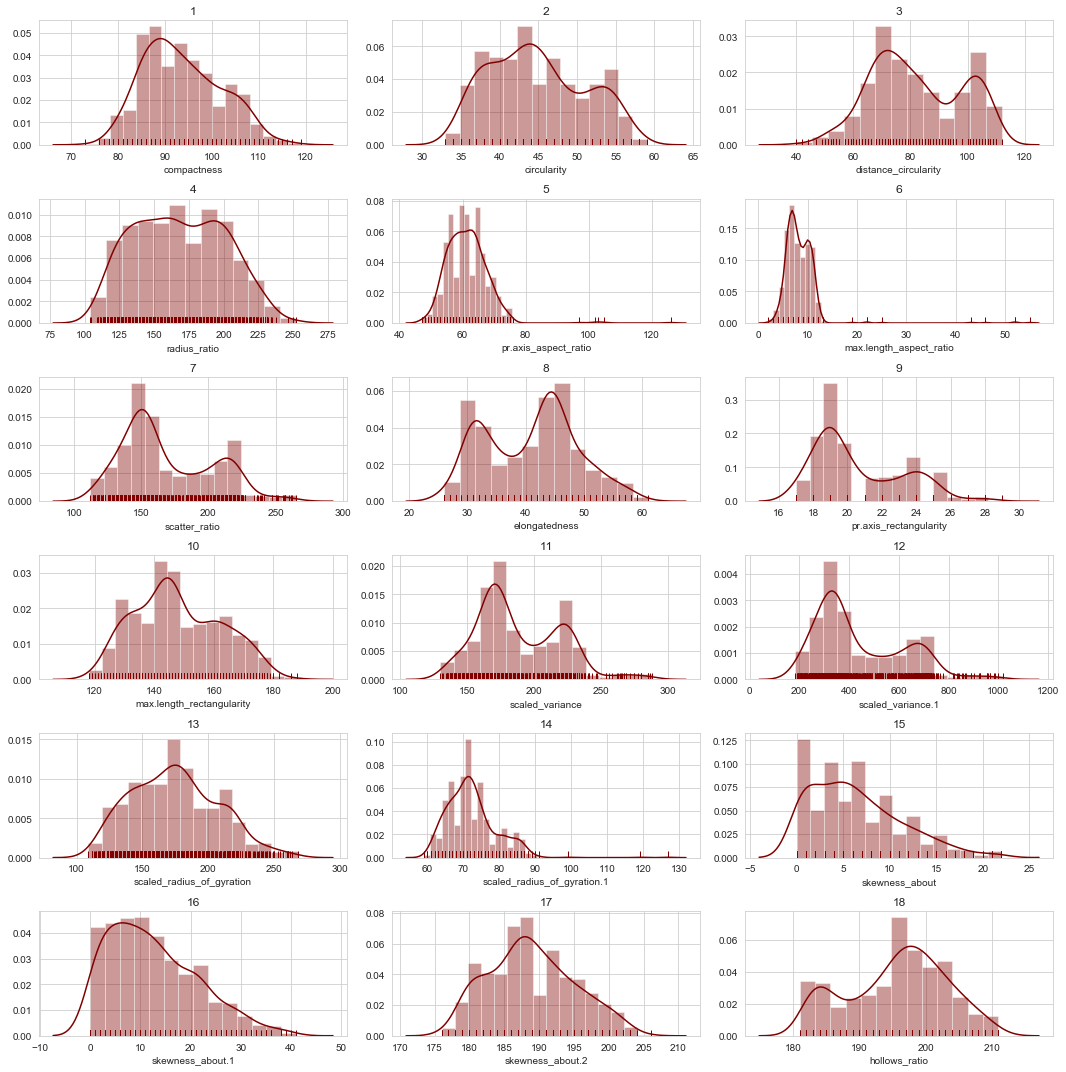

In [62]:
fig, ax =plt.subplots(nrows=6,ncols=3,figsize=(15, 15))

col=0
for i in range(0,6):
    for j in range(0,3):
        sns.distplot(a=df[df.columns[:-1][col]],ax=ax[i][j],color="maroon",rug=True)
        ax[i][j].set_title(col+1)
        col=col+1

fig.show()
plt.tight_layout()

Most of the features ssem to have bimodal distribution. Other than that, the features have somwhat normal distribution. A very few features show some sort of skewness

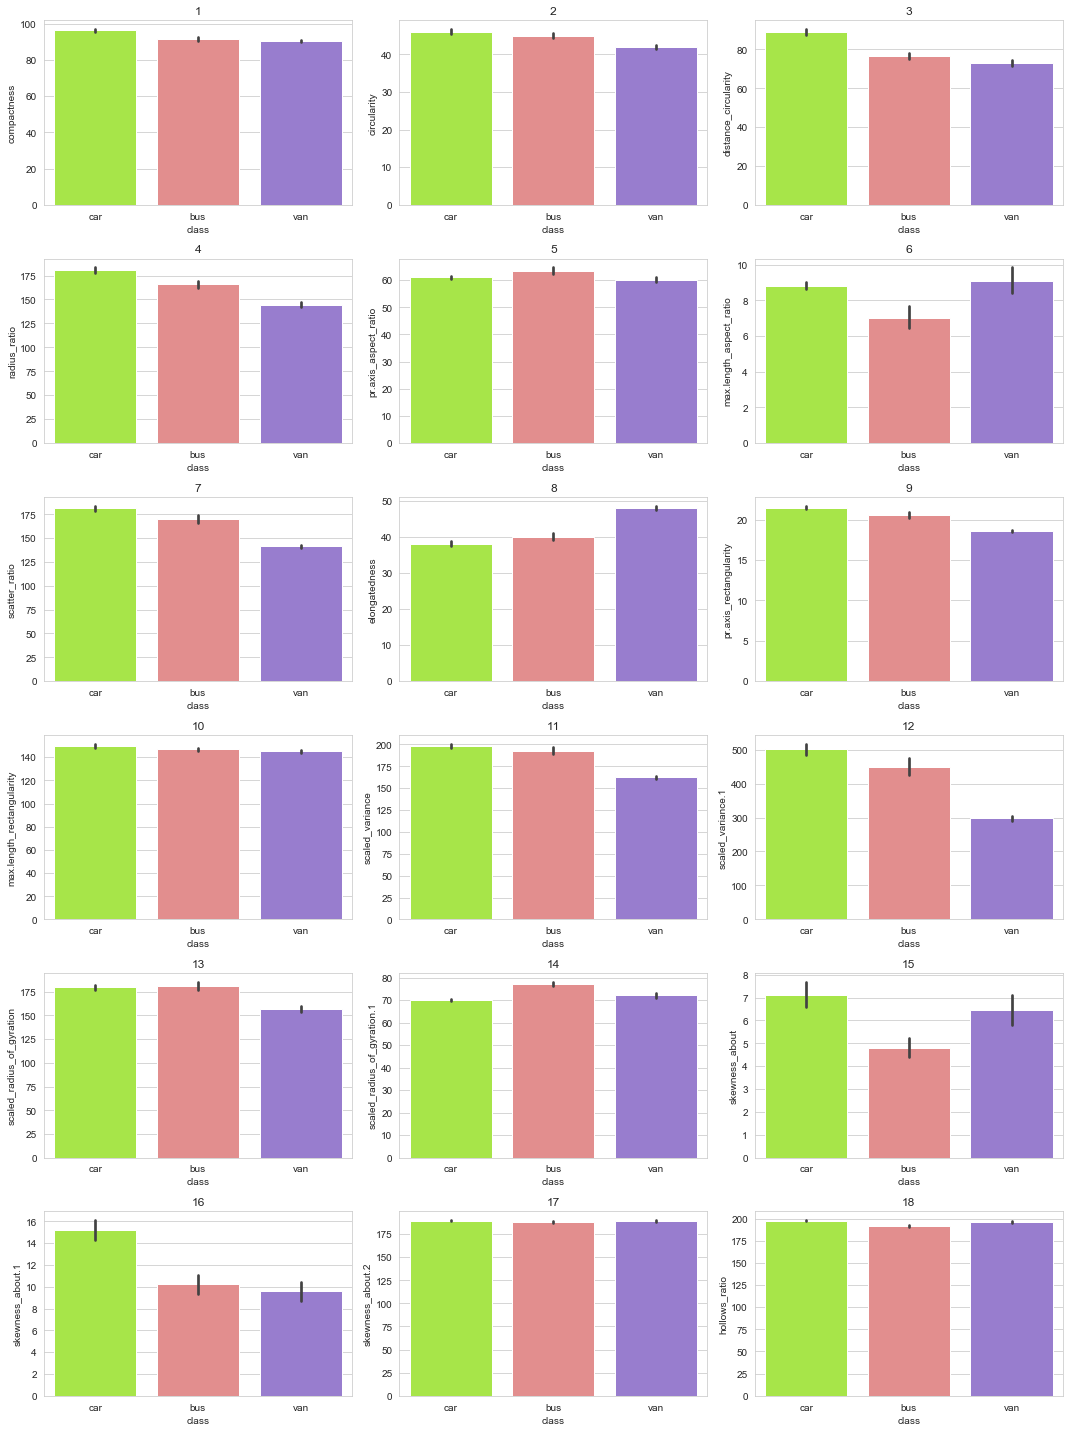

In [63]:
fig, ax =plt.subplots(nrows=6,ncols=3,figsize=(15, 20))

col=0
for i in range(0,6):
    for j in range(0,3):
        sns.barplot(x="class", y=df.columns[:-1][col],data=df,ax=ax[i][j],palette=["greenyellow","lightcoral","mediumpurple"])
        ax[i][j].set_title(col+1)
        ax[i][j].set_xticklabels(["car","bus","van"])
        col=col+1


fig.show()
plt.tight_layout()

# Centering and scaling the data

In [64]:
from scipy.stats import zscore

y = df["class"]
x = df.drop(['class'], axis=1)

x=x.apply(zscore)
x.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.159189     0.518376              0.059793      0.298715   
1    -0.326150    -0.621742              0.123197     -0.849858   
2     1.251200     0.844123              1.518074      1.261034   
3    -0.083480    -0.621742             -0.003610     -0.291093   
4    -1.054157    -0.133120             -0.764452      1.136863   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.586946                 0.400417      -0.209731   
1             -0.664982                 0.146237      -0.600955   
2              0.686175                 0.400417       1.144507   
3              0.235789                 0.146237      -0.751426   
4              6.240929                11.076002      -0.600955   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.138170               -0.225102                   0.760160   
1       0.521738               -0.610796                  -0.341843   
2      -1.140392                0.931979                   0.691285   
3       0.649594               -0.610796                  -0.341843   
4       0.521738               -0.610796                  -0.272968   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.399081          -0.345176                   0.286559   
1        -0.593116          -0.622595                  -0.511712   
2         1.120863           1.104193                   1.391856   
3        -0.916509          -0.741488                  -1.463496   
4         1.702970          -0.650903                   0.409369   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.329588       -0.074621          0.379883   
1                    -0.041220        0.538093          0.156173   
2                     0.102964        1.559282         -0.403103   
3                    -1.338878       -0.074621         -0.291248   
4                     7.888914        0.538093         -0.179393   

   skewness_about.2  hollows_ratio  
0         -0.313732       0.183180  
1          0.011177       0.451738  
2         -0.151278       0.048901  
3          1.635726       1.525970  
4         -1.450916      -1.696726

# Features that can be left out of analysis

#### Clearly the dataset has a lot of dimensions but a few rows comparitively. Also many of the features are highly correlated. The dataset has multi-colinearity. There is a high likelihood that many of the features bring the same amount of information on the table hence feature selection/feature extraction must be performed.  

#### Below is the L1 regulariztion to see what all features bring vital information and seperate them from others which have less information. We will run a logistic regression model with l1 regularization with an aim to seperate out the "important" features.
**NOTE THAT**: this is not the model. This is just to have an idea about which features bring more information as compared to others and which features "can be" left out of the analysis. However, we **WILL NOT** leave out any feature and will perform feature extraction in the later section. **We will reduce the dimensionality without having to drop any feature**.

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100)

**The regularization parameter (c) is inverse of regularization strength i.e smaller the c value, more the regularization penalty.... we will regularize the model starting with c=10(lenient) and make the regularization stricter moving forward and see which features can be dropped**

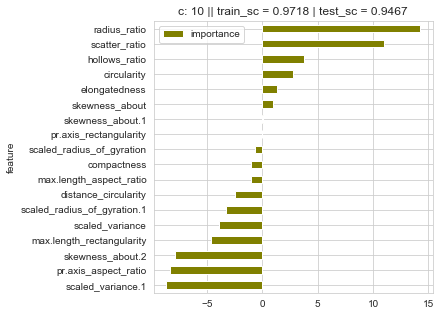

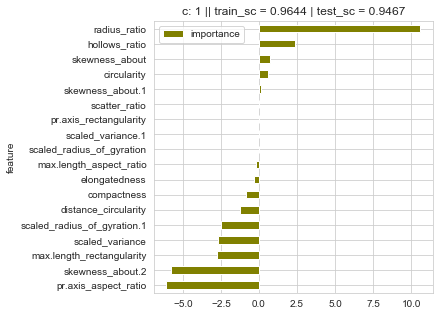

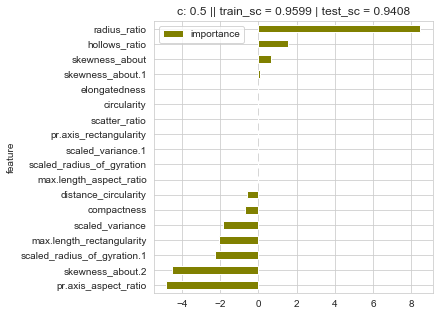

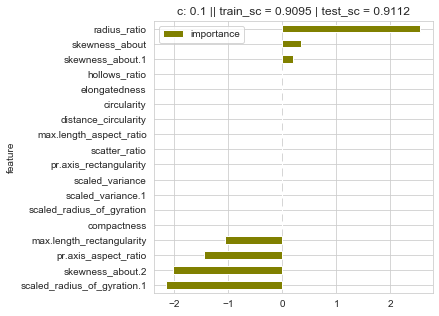

In [66]:
c_param=[10,1,0.5,0.1]
for c in c_param: 
    clf = LogisticRegression(penalty='l1', C=c, solver="liblinear", random_state=7)
    clf.fit(x_train,y_train)
    
    features = pd.DataFrame()
    features['feature'] = x_train.columns
    features['importance'] = clf.coef_[0]
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    features.plot(kind='barh',color="olive", figsize=(5, 5), title="c: "+str(c)+" || train_sc = "+str(round(clf.score(x_train,y_train),4))+" | test_sc = "+str(round(clf.score(x_test,y_test),4)))

As we can see we started with c=10, which is a very lenient penalty and it gave us a good accuracy on both training and testing sets<br><br>
Then making the penalty a bit more strict, we set c=1 and there was a dip in the training score of 0.5(approx) but the testing score was exactly the same as before... **BUT** we can see that **with c=1, we left out 4 features** from the model thereby reducing the dimensionality. **(scatter_ratio, pr.axis_rectangularity, scaled_variance.1, scaled_radius_of_gyration)**<br><br>
Further, we made the penalty a bit more strict **with c=0.5 and this time we left out 6 features** from the model without much compromising with the performance **(circularity, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance.1, scaled_radius_of_gyration)**. The training and testing score dropped by just 0.5 but we modelled with 12 features instead of 18.<br><br>
Finally we made the penalty extremely strict with c=0.1 and we can see that we left out a lot of features from the model (11 features) and the accuracy dropped by 5%.<br><br>
**TO CONCLUDE:**<br>
We can choose 0.5 to be a good choice and we can say that we can safely drop out  above mentioned 6 features before modelling and still get a very good model performance.

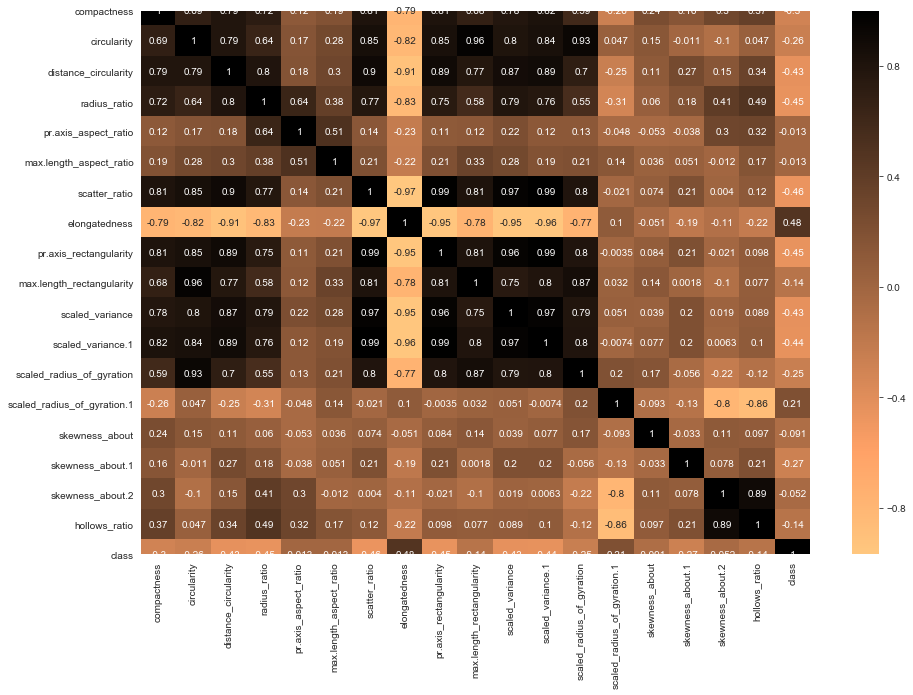

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="copper_r")

If you carefully look at the  correlation matrix, you will observe that by regularization we were able to solve the issue of multi-colinearity by dropping some features that had very high correlation with other features.<br><br> **Therefore looking at the multi-collinear relationship among our variables we can drop out circularity, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance.1 and scaled_radius_of_gyration and build a model on the remaining 12 features without severly affecting the model performance.**

In [68]:
x_mod = x.drop(["circularity","scatter_ratio","elongatedness","pr.axis_rectangularity","scaled_variance.1","scaled_radius_of_gyration"], axis=1)
lr = LogisticRegression(solver="liblinear", random_state=7)
lrscores = cross_val_score(lr, x, y, cv=5)
print("5-fold cross val avg performance: "+str(lrscores.mean()))

5-fold cross val avg performance: 0.9347260855942136


Therefore we can see that after actually dropping the above mentioned 6 features we were able to get an equivelant performance with a simple logistic regression model (without regularization).<br>
**Earlier the test accuracy was:** 94.67 % (c=10, without dropping any features - using all 18 features)<br>
**Now the test accuracy is:** 93.47 % (dropping 6 features - using only 12 features)

## Further, like we said this is not our model. Our aim is not to reduce dimensionality by dropping/leaving out any feature. We were regularizing just to identify features that were causing multi-collinearity in the data.
## Our aim is to reduce the dimensionality with minimal information loss. The issue with "feature selection" is that we identify the important features and leave out the others as a result even if a feature had small amount of information, we lose it completely by removing the feature.
## Hence we will instead use "feature extraction" where we will create new features from the existing features without having to drop any feature. This will be done via PCA. These new features will be linear combination of our old features.
### We will first train an SVM model on the raw data and then on the data with PCA components.<br><br>
SVM on the raw data set:

In [69]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf",random_state=7)
svm.fit(x_train,y_train)
print("train accuracy: "+str(svm.score(x_train,y_train)))
print("test accuracy: "+str(svm.score(x_test,y_test)))

train accuracy: 0.9777448071216617
test accuracy: 0.9822485207100592


**SVM seems to overfit the data**

PCA tranformation of the dataset 

In [70]:
from sklearn.decomposition import PCA

#we will include all the 18 features and come up with 18 components of our data
pca = PCA(n_components=18)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [71]:
print("Eigen values:")
print("")
print(pca.explained_variance_)

Eigen values:

[9.50345742e+00 3.16022254e+00 1.55936515e+00 1.18148442e+00
 9.22020706e-01 5.97479255e-01 4.00299446e-01 2.23434968e-01
 1.62977361e-01 9.23577495e-02 6.31347885e-02 4.62524176e-02
 3.47809502e-02 2.59027621e-02 1.97484050e-02 1.68583718e-02
 8.12320047e-03 3.47776648e-03]


In [72]:
print("Eigen vectors/pca components:")
print("")
print(pca.components_)

Eigen vectors/pca components:

[[ 2.75028827e-01  2.91202116e-01  3.03551258e-01  2.73641608e-01
   8.54635427e-02  1.03460991e-01  3.15615648e-01 -3.13290530e-01
   3.13197511e-01  2.80614880e-01  3.09264015e-01  3.13515288e-01
   2.69415860e-01 -3.30001853e-02  4.19251265e-02  5.87514991e-02
   3.36892348e-02  7.72864367e-02]
 [-1.09080258e-01  1.27848240e-01 -6.27637984e-02 -2.07459900e-01
  -1.93457041e-01 -2.95740980e-02  6.03095235e-02  2.02862608e-03
   7.34632581e-02  1.19065498e-01  6.31730855e-02  6.57786230e-02
   2.09132816e-01  4.92240244e-01 -4.69829563e-02 -1.10257964e-01
  -5.26348736e-01 -5.26783164e-01]
 [-1.50464349e-01  2.10229683e-02 -6.60115437e-02  2.12151421e-01
   6.48816544e-01  5.98823015e-01 -8.86560012e-02  4.32365582e-02
  -1.00327629e-01  2.14470971e-02  1.66425418e-03 -1.01294325e-01
   1.89653624e-02  2.46511229e-01 -1.47514540e-01 -1.80091512e-01
  -4.57114339e-02 -8.49397375e-03]
 [ 9.04671886e-02  1.88258936e-01 -6.50812199e-02 -6.57335636e-02
  -1.8

we will now look at the "importance" of each component i.e the varience explained by each component. Right now we have 18 components. We will select the top components that explain the 95% of the varience and tranform our data to those no. of components

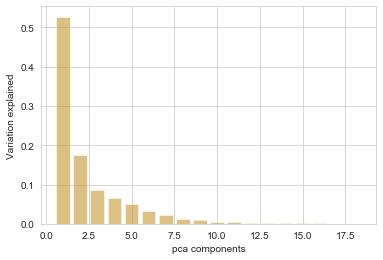

In [73]:
plt.bar(list(range(1,19)), pca.explained_variance_ratio_, alpha=0.5, align='center',color="darkgoldenrod")
plt.ylabel('Variation explained')
plt.xlabel('pca components')
plt.show()

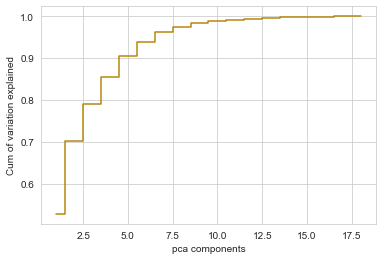

In [74]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid',color="darkgoldenrod")
plt.ylabel('Cum of variation explained')
plt.xlabel('pca components')
plt.show()

**Looking at the above figures 6.5 - 7 components explain 95-96% variation. We will go with 7 components and reduce our dimensionality from 18 to 7.**

In [75]:
pca = PCA(n_components=7)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

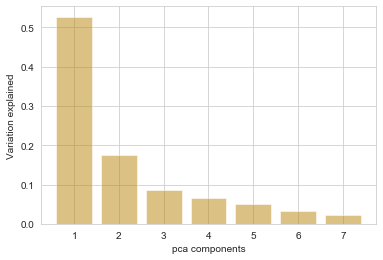

In [76]:
plt.bar(list(range(1,8)), pca.explained_variance_ratio_, alpha=0.5, align='center',color="darkgoldenrod")
plt.ylabel('Variation explained')
plt.xlabel('pca components')
plt.show()

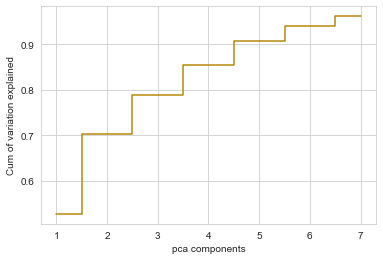

In [77]:
plt.step(list(range(1,8)),np.cumsum(pca.explained_variance_ratio_), where='mid',color="darkgoldenrod")
plt.ylabel('Cum of variation explained')
plt.xlabel('pca components')
plt.show()

**Confirming that indeed top 7 components are able to explain about 96% of variation.** Finally tranforming data from 18 features to 7 new features

In [78]:
pca_data = pca.transform(x)
pca_data.shape

(843, 7)

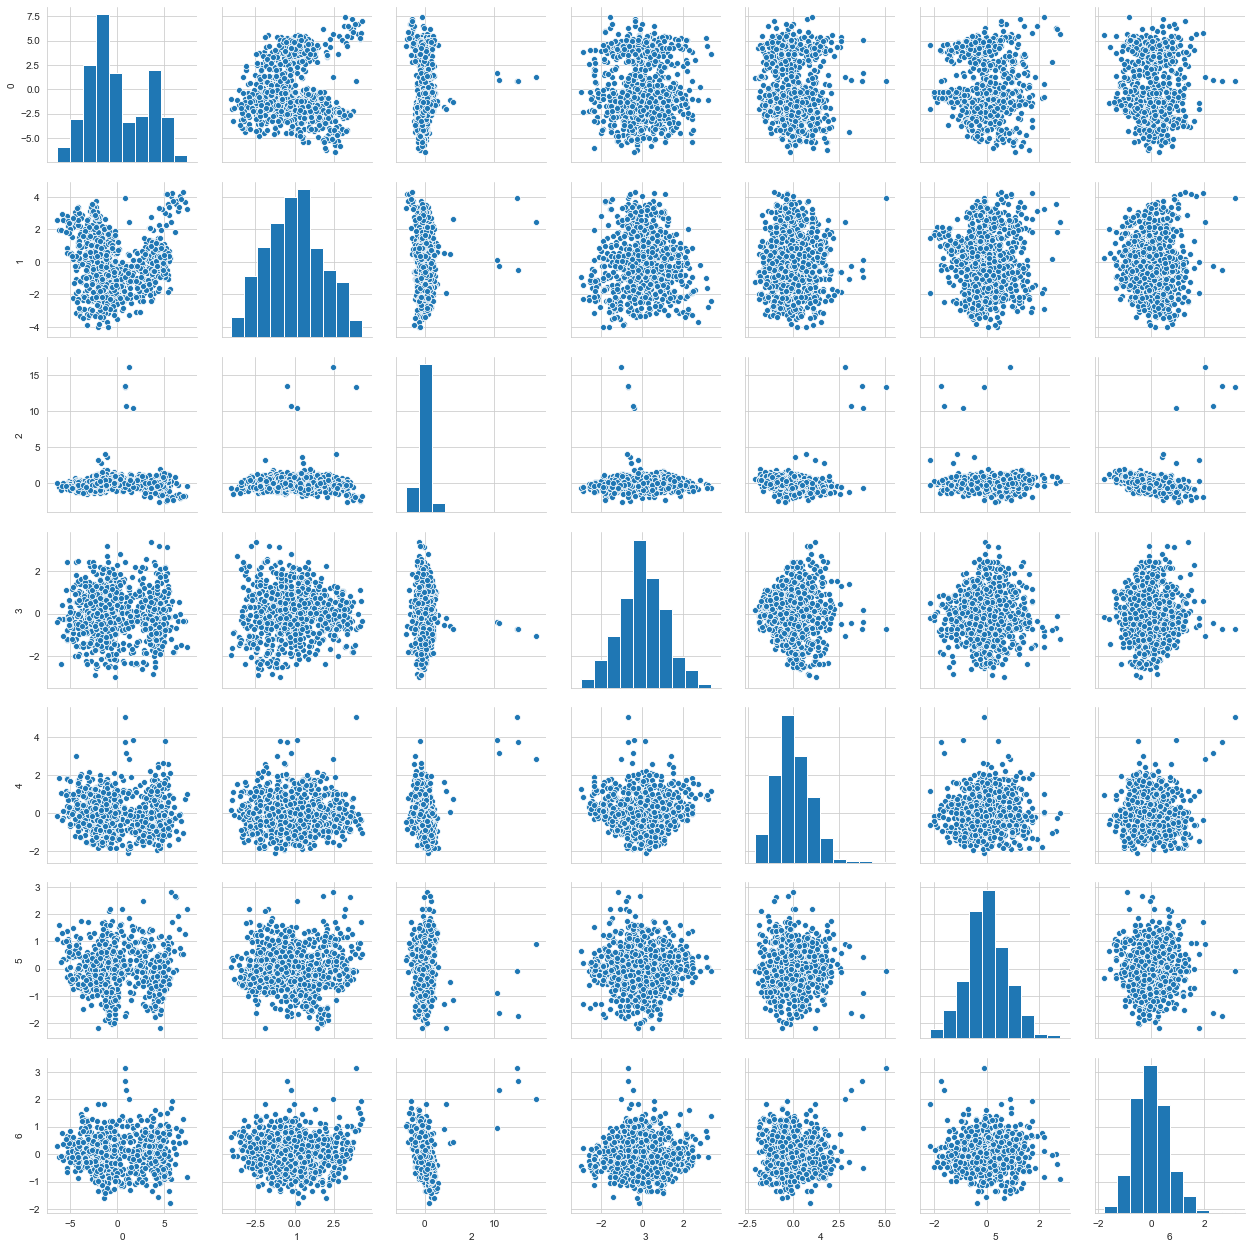

In [79]:
sns.pairplot(pd.DataFrame(pca_data))

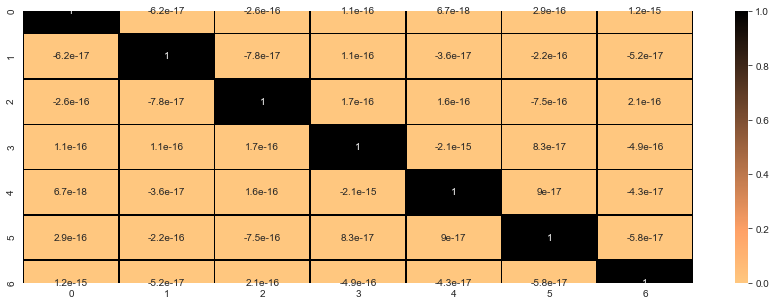

In [80]:
plt.figure(figsize=(15,5))
sns.heatmap(pd.DataFrame(pca_data).corr(),annot=True,cmap="copper_r",linecolor="black",linewidth=0.5)

**Looking at the above plots we can see that none of the features are correlated to each other i.e completely independent. Likewise none of the features have colinearity.**

SVM on the PCA data set:

In [81]:
x_train, x_test, y_train, y_test = train_test_split(pca_data, y, test_size=0.20, random_state=100)

svm = SVC(kernel="rbf",random_state=7)
svm.fit(x_train,y_train)
print("train accuracy: "+str(svm.score(x_train,y_train)))
print("test accuracy: "+str(svm.score(x_test,y_test)))

train accuracy: 0.9643916913946587
test accuracy: 0.9467455621301775


In [82]:
svm = SVC(kernel="rbf",random_state=7)
svm_scores = cross_val_score(svm, pca_data, y, cv=5)
print("5-fold cross val avg performance: "+str(svm_scores.mean()))

5-fold cross val avg performance: 0.9252161114596424


**REMARKS:**<br>With a better train and test accuracy we can see that SVM worked much better on PCA transformed data.<br><br>If you recall when we regularized the logistic regression model and modelled **using 12 features(reduced 6 features)** we got a train and test accuracy of **0.9599(=0.96) and 0.94 respectively**. The **5-fold cross-validation score was: 0.935**.<br><br>With PCA transformed data we modelled **using 7 features only(reduced 11 features)** and got an equivalant performance with train and test accuracy of **0.9643(=0.965) and 0.9467(=0.947) respectively**. The **5-fold cross-validation score now is: 0.925**.

### We can further tune the hyper parameters for better accuracy

In [83]:
gma=[0.0001,0.001,0.01,0.1]
com=[100,1000,10000,100000]


d={'gma':[],'com':[],'10-fold avg score':[]}

for g in gma:
    for c in com:
        d['gma'].append(g)
        d['com'].append(c)
        svm = SVC(kernel="rbf", gamma=g, C=c,random_state=7)
        svm_scores = cross_val_score(svm, pca_data, y, cv=10)
        d['10-fold avg score'].append(svm_scores.mean())    
        
        
thedf = pd.DataFrame(d)
thedf

gma     com  10-fold avg score
0   0.0001     100           0.803002
1   0.0001    1000           0.826644
2   0.0001   10000           0.868175
3   0.0001  100000           0.911989
4   0.0010     100           0.877586
5   0.0010    1000           0.914413
6   0.0010   10000           0.929907
7   0.0010  100000           0.925157
8   0.0100     100           0.934641
9   0.0100    1000           0.926333
10  0.0100   10000           0.914471
11  0.0100  100000           0.909679
12  0.1000     100           0.916923
13  0.1000    1000           0.909793
14  0.1000   10000           0.909793
15  0.1000  100000           0.909793

In [84]:
thedf[thedf['10-fold avg score']==thedf['10-fold avg score'].max()]

gma  com  10-fold avg score
8  0.01  100           0.934641

With appropriate gamma and c we can improve the accuracy from 0.925 to 0.935 on PCA data with 7 features. This is exactly equivalant to the accuracy when we "dropped" 6 features and modelled with 12 features